In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
sqrt = np.sqrt
log = np.log
exp = np.exp
sin = np.sin
cos = np.cos

# Chapter 4<br>Least Squares

## 4.5 Nonlinear Least Squares

In [3]:
def Newton_Method(F, DF, x, iter_num=10**4):
    for _ in range(iter_num):
        s = np.linalg.inv(DF(x)).dot(F(x))        
        x -= s
    
    return x

In [4]:
def Gauss_Newton(r, Dr, x, iter_num=10**4):
    for _ in range(iter_num):
        A = Dr(x)
        v = -np.linalg.inv(A.T.dot(A)).dot(A.T).dot(r(x))
        x += v
    
    return x

In [5]:
def Levenberg_Marquardt(r, Dr, x, lamb=1, iter_num=10**4):
    for _ in range(iter_num):
        A = Dr(x)
        ATA = A.T.dot(A)
        v = -np.linalg.inv(ATA + lamb*np.diag(np.diag(ATA))).dot(A.T).dot(r(x))
        x += v
    
    return x

### Q. 1

In [6]:
# (a)
def r(x):
    c1, c2, c3 = ((0, 1), (1, 1), (0, -1))
    
    r1 = sqrt(np.sum((c1 - x)**2)) - 1
    r2 = sqrt(np.sum((c2 - x)**2)) - 1
    r3 = sqrt(np.sum((c3 - x)**2)) - 1
    
    return np.array([r1, r2, r3])
        
def Dr(x):    
    c1, c2, c3 = ((0, 1), (1, 1), (0, -1))

    dr1 = (x - c1) / sqrt(np.sum((c1 - x)**2))
    dr2 = (x - c2) / sqrt(np.sum((c2 - x)**2))
    dr3 = (x - c3) / sqrt(np.sum((c3 - x)**2))
    
    return np.array([dr1, dr2, dr3])

In [7]:
initial_guess = np.zeros(2, dtype=float)
(x, y) = Gauss_Newton(r, Dr, initial_guess)

print("(x, y): (%.6f, %.6f)" % (x, y))

(x, y): (0.410623, 0.055501)


In [8]:
# (b)
def r(x):
    c1, c2, c3 = ((-1, 0), (1, 1), (1, -1))
    
    r1 = sqrt(np.sum((c1 - x)**2)) - 1
    r2 = sqrt(np.sum((c2 - x)**2)) - 1
    r3 = sqrt(np.sum((c3 - x)**2)) - 1
    
    return np.array([r1, r2, r3])
        
def Dr(x):    
    c1, c2, c3 = ((-1, 0), (1, 1), (1, -1))
    
    dr1 = (x - c1) / sqrt(np.sum((c1 - x)**2))
    dr2 = (x - c2) / sqrt(np.sum((c2 - x)**2))
    dr3 = (x - c3) / sqrt(np.sum((c3 - x)**2))
    
    return np.array([dr1, dr2, dr3])

In [9]:
initial_guess = np.zeros(2, dtype=float)
(x, y) = Gauss_Newton(r, Dr, initial_guess)

print("(x, y): (%.6f, %.6f)" % (x, y))

(x, y): (0.275549, 0.000000)


### Q. 2

In [10]:
# (a)
def F(X):
    x = X[:2]
    K = X[2]
    
    c1, c2, c3 = ((0, 1), (1, 1), (0, -1))
    
    f1 = sqrt(np.sum((c1 - x)**2)) - (1 + K)
    f2 = sqrt(np.sum((c2 - x)**2)) - (1 + K)
    f3 = sqrt(np.sum((c3 - x)**2)) - (1 + K)
    
    return np.array([f1, f2, f3])
        
def DF(X):
    x = X[:2]
    
    c1, c2, c3 = ((0, 1), (1, 1), (0, -1))
    n = 3

    dr1 = (x - c1) / sqrt(np.sum((c1 - x)**2))
    dr2 = (x - c2) / sqrt(np.sum((c2 - x)**2))
    dr3 = (x - c3) / sqrt(np.sum((c3 - x)**2))
    
    df = np.array([dr1, dr2, dr3])
    
    return np.concatenate((df, -np.ones((n, 1))), axis=1)

In [11]:
initial_guess = np.zeros(3, dtype=float)
(x, y, K) = Newton_Method(F, DF, initial_guess)

print("(x, y, K): (%.6f, %.6f, %.6f)" % (x, y, K))

(x, y, K): (0.500000, 0.000000, 0.118034)


In [12]:
# (b)
def F(X):
    x = X[:2]
    K = X[2]
    
    c1, c2, c3 = ((-1, 0), (1, 1), (1, -1))
    
    f1 = sqrt(np.sum((c1 - x)**2)) - (1 + K)
    f2 = sqrt(np.sum((c2 - x)**2)) - (1 + K)
    f3 = sqrt(np.sum((c3 - x)**2)) - (1 + K)
    
    return np.array([f1, f2, f3])
        
def DF(X):
    x = X[:2]
    
    c1, c2, c3 = ((-1, 0), (1, 1), (1, -1))
    n = 3

    dr1 = (x - c1) / sqrt(np.sum((c1 - x)**2))
    dr2 = (x - c2) / sqrt(np.sum((c2 - x)**2))
    dr3 = (x - c3) / sqrt(np.sum((c3 - x)**2))
    
    df = np.array([dr1, dr2, dr3])
    
    return np.concatenate((df, -np.ones((n, 1))), axis=1)

In [13]:
initial_guess = np.zeros(3, dtype=float)
(x, y, K) = Newton_Method(F, DF, initial_guess)

print("(x, y, K): (%.6f, %.6f, %.6f)" % (x, y, K))

(x, y, K): (0.250000, 0.000000, 0.250000)


### Q. 3

In [14]:
# (a)
def r(X):
    x = X[:2]
    K = X[2]
    
    c1, c2, c3, c4 = ((-1, 0), (1, 0), (0, 1), (0, -2))
    
    r1 = sqrt(np.sum((c1 - x)**2)) - (1 + K)
    r2 = sqrt(np.sum((c2 - x)**2)) - (1 + K)
    r3 = sqrt(np.sum((c3 - x)**2)) - (1 + K)
    r4 = sqrt(np.sum((c4 - x)**2)) - (1 + K)
    
    return np.array([r1, r2, r3, r4])
        
def Dr(X):
    x = X[:2]
    
    c1, c2, c3, c4 = ((-1, 0), (1, 0), (0, 1), (0, -2))
    n = 4

    dr1 = (x - c1) / sqrt(np.sum((c1 - x)**2))
    dr2 = (x - c2) / sqrt(np.sum((c2 - x)**2))
    dr3 = (x - c3) / sqrt(np.sum((c3 - x)**2))
    dr4 = (x - c4) / sqrt(np.sum((c4 - x)**2))
    
    dr = np.array([dr1, dr2, dr3, dr4])
    
    return np.concatenate((dr, -np.ones((n, 1))), axis=1)

In [15]:
initial_guess = np.zeros(3, dtype=float)
(x, y, K) = Gauss_Newton(r, Dr, initial_guess)

print("(x, y, K): (%.6f, %.6f, %.6f)" % (x, y, K))

(x, y, K): (0.000000, -0.586187, 0.329572)


In [16]:
# (b)
def r(X):
    x = X[:2]
    K = X[2]
    
    c1, c2, c3, c4 = ((-2, 0), (3, 0), (0, 2), (0, -2))
    
    r1 = sqrt(np.sum((c1 - x)**2)) - (1 + K)
    r2 = sqrt(np.sum((c2 - x)**2)) - (1 + K)
    r3 = sqrt(np.sum((c3 - x)**2)) - (1 + K)
    r4 = sqrt(np.sum((c4 - x)**2)) - (1 + K)
    
    return np.array([r1, r2, r3, r4])
        
def Dr(X):
    x = X[:2]
    
    c1, c2, c3, c4 = ((-2, 0), (3, 0), (0, 2), (0, -2))
    n = 4

    dr1 = (x - c1) / sqrt(np.sum((c1 - x)**2))
    dr2 = (x - c2) / sqrt(np.sum((c2 - x)**2))
    dr3 = (x - c3) / sqrt(np.sum((c3 - x)**2))
    dr4 = (x - c4) / sqrt(np.sum((c4 - x)**2))
    
    dr = np.array([dr1, dr2, dr3, dr4])
    
    return np.concatenate((dr, -np.ones((n, 1))), axis=1)

In [17]:
initial_guess = np.zeros(3, dtype=float)
(x, y, K) = Gauss_Newton(r, Dr, initial_guess)

print("(x, y, K): (%.6f, %.6f, %.6f)" % (x, y, K))

(x, y, K): (0.556854, 0.000000, 1.288037)


### Q. 4

In [18]:
# (a)
def r(X):
    x = X[:2]
    K = X[2]
    
    c1, c2, c3, c4, c5 = ((-2, 0), (2, 0), (0, 2), (0, -2), (2, 2))
    
    r1 = sqrt(np.sum((c1 - x)**2)) - (1 + K)
    r2 = sqrt(np.sum((c2 - x)**2)) - (1 + K)
    r3 = sqrt(np.sum((c3 - x)**2)) - (1 + K)
    r4 = sqrt(np.sum((c4 - x)**2)) - (1 + K)
    r5 = sqrt(np.sum((c5 - x)**2)) - (2 + K)
    
    return np.array([r1, r2, r3, r4, r5])
        
def Dr(X):
    x = X[:2]
    
    c1, c2, c3, c4, c5 = ((-2, 0), (2, 0), (0, 2), (0, -2), (2, 2))
    n = 5

    dr1 = (x - c1) / sqrt(np.sum((c1 - x)**2))
    dr2 = (x - c2) / sqrt(np.sum((c2 - x)**2))
    dr3 = (x - c3) / sqrt(np.sum((c3 - x)**2))
    dr4 = (x - c4) / sqrt(np.sum((c4 - x)**2))
    dr5 = (x - c5) / sqrt(np.sum((c5 - x)**2))
    
    dr = np.array([dr1, dr2, dr3, dr4, dr5])
    
    return np.concatenate((dr, -np.ones((n, 1))), axis=1)

In [19]:
initial_guess = np.zeros(3, dtype=float)
(x, y, K) = Gauss_Newton(r, Dr, initial_guess)

print("(x, y, K): (%.6f, %.6f, %.6f)" % (x, y, K))

(x, y, K): (-0.034434, -0.034434, 0.975662)


In [20]:
# (b)
def r(X):
    x = X[:2]
    K = X[2]
    
    c1, c2, c3, c4, c5 = ((1, 1), (1, -1), (-1, 1), (-1, -1), (2, 0))
    
    r1 = sqrt(np.sum((c1 - x)**2)) - (1 + K)
    r2 = sqrt(np.sum((c2 - x)**2)) - (1 + K)
    r3 = sqrt(np.sum((c3 - x)**2)) - (1 + K)
    r4 = sqrt(np.sum((c4 - x)**2)) - (1 + K)
    r5 = sqrt(np.sum((c5 - x)**2)) - (1 + K)
    
    return np.array([r1, r2, r3, r4, r5])
        
def Dr(X):
    x = X[:2]
    
    c1, c2, c3, c4, c5 = ((1, 1), (1, -1), (-1, 1), (-1, -1), (2, 0))
    n = 5

    dr1 = (x - c1) / sqrt(np.sum((c1 - x)**2))
    dr2 = (x - c2) / sqrt(np.sum((c2 - x)**2))
    dr3 = (x - c3) / sqrt(np.sum((c3 - x)**2))
    dr4 = (x - c4) / sqrt(np.sum((c4 - x)**2))
    dr5 = (x - c5) / sqrt(np.sum((c5 - x)**2))
    
    dr = np.array([dr1, dr2, dr3, dr4, dr5])
    
    return np.concatenate((dr, -np.ones((n, 1))), axis=1)

In [21]:
initial_guess = np.zeros(3, dtype=float)
(x, y, K) = Gauss_Newton(r, Dr, initial_guess)

print("(x, y, K): (%.6f, %.6f, %.6f)" % (x, y, K))

(x, y, K): (0.174972, -0.000000, 0.500731)


### Q. 5

In [22]:
height = np.array([0.9120, 0.9860, 1.0600, 1.1300, 1.1900, 1.2600, 1.3200, 1.3800, 1.4100, 1.4900])
weight = np.array([13.7, 15.9, 18.5, 21.3, 23.5, 27.2, 32.7, 36.0, 38.6, 43.7])

In [23]:
def model(c1, c2):
    return c1*height**c2

def r(X):
    x, y = X
    return model(x, y) - weight

def Dr(X):
    x, y = X
    
    dr1 = height**y
    dr2 = x*height**y*log(height)
    
    return np.array([dr1, dr2]).T

In [24]:
initial_guess = np.array((10, 1), dtype=float) # (16.3, 2.42)
c1, c2 = Gauss_Newton(r, Dr, initial_guess, iter_num=10**4)
RMSE = sqrt(np.mean((model(c1, c2) - weight)**2))

print("(c1, c2): (%.6f, %.6f)" % (c1, c2))
print("RMSE: %f" % RMSE)

(c1, c2): (15.885374, 2.533593)
RMSE: 0.754702


### Q. 6

In [25]:
hour = np.arange(1, 9)
concentration = np.array([8.0, 12.3, 15.5, 16.8, 17.1, 15.8, 15.2, 14.0])

In [26]:
def model(c1, c2):
    return c1*hour*exp(c2*hour)

def r(X):
    x, y = X
    return model(x, y) - concentration

def Dr(X):
    x, y = X
    
    dr1 = hour*exp(y*hour)
    dr2 = c1*hour**2*exp(y*hour)
    
    return np.array([dr1, dr2]).T

In [27]:
initial_guess = np.array((1, 0), dtype=float) 
c1, c2 = Gauss_Newton(r, Dr, initial_guess, iter_num=10**4)

print("(c1, c2): (%.6f, %.6f)" % (c1, c2))

(c1, c2): (9.796928, -0.215087)


### Q. 7

In [28]:
height = np.array([0.9120, 0.9860, 1.0600, 1.1300, 1.1900, 1.2600, 1.3200, 1.3800, 1.4100, 1.4900])
weight = np.array([13.7, 15.9, 18.5, 21.3, 23.5, 27.2, 32.7, 36.0, 38.6, 43.7])

In [29]:
def model(c1, c2):
    return c1*height**c2

def r(X):
    x, y = X
    return model(x, y) - weight

def Dr(X):
    x, y = X
    
    dr1 = height**y
    dr2 = x*height**y*log(height)
    
    return np.array([dr1, dr2]).T

In [30]:
initial_guess = np.array((10, 1), dtype=float) # (16.3, 2.42)
lamb = 1
c1, c2 = Levenberg_Marquardt(r, Dr, initial_guess, lamb)
RMSE = sqrt(np.mean((model(c1, c2) - weight)**2))

print("(c1, c2): (%.6f, %.6f)" % (c1, c2))
print("RMSE: %f" % RMSE)

(c1, c2): (15.885374, 2.533593)
RMSE: 0.754702


### Q. 8

In [31]:
hour = np.arange(1, 9)
concentration = np.array([8.0, 12.3, 15.5, 16.8, 17.1, 15.8, 15.2, 14.0])

In [32]:
def model(c1, c2):
    return c1*hour*exp(c2*hour)

def r(X):
    x, y = X
    return model(x, y) - concentration

def Dr(X):
    x, y = X
    
    dr1 = hour*exp(y*hour)
    dr2 = c1*hour**2*exp(y*hour)
    
    return np.array([dr1, dr2]).T

In [33]:
initial_guess = np.array((1, 0), dtype=float) 
lamb = 1
c1, c2 = Levenberg_Marquardt(r, Dr, initial_guess, lamb)

print("(c1, c2): (%.6f, %.6f)" % (c1, c2))

(c1, c2): (9.796928, -0.215087)


### Q. 9

In [34]:
def model(c1, c2, c3):
    return c1*exp(-c2*(t_i-c3)**2)

def r(X):
    x, y, z = X
    return model(x, y, z) - y_i

def Dr(X):
    x, y, z = X
    
    dr1 = exp(-y*(t_i-z)**2)
    dr2 = x*exp(-y*(t_i-z)**2) * (-(t_i-z)**2)
    dr3 = x*exp(-y*(t_i-z)**2) * 2*y*(t_i-z)
    
    return np.array([dr1, dr2, dr3]).T

In [35]:
# (a)
t_i = np.array([-1, 0, 1, 3, 6])
y_i = np.array([1, 5, 10, 8, 1])

In [36]:
initial_guess = np.array((1, 1, 1), dtype=float) 
lamb = 50
c1, c2, c3 = Levenberg_Marquardt(r, Dr, initial_guess, lamb)
RMSE = sqrt(np.mean((model(c1, c2, c3) - y_i)**2))

print("Initial guess: (1, 1, 1)")
print("lambda: %d" % lamb)
print("RMSE: %f" % RMSE)

Initial guess: (1, 1, 1)
lambda: 50
RMSE: 0.441305


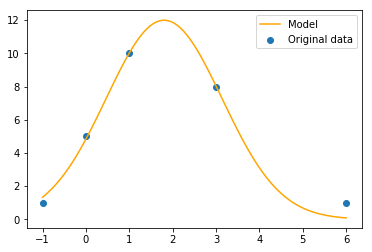

In [37]:
x = np.linspace(-1, 6, 100)
plt.scatter(t_i, y_i, label="Original data")
plt.plot(x, c1*exp(-c2*(x-c3)**2), label="Model", c='orange')
plt.legend()

plt.show()

In [38]:
# (b)
t_i = np.array([1, 2, 4, 5, 6, 8, 9, 11])
y_i = np.array([1, 3, 7, 12, 13, 5, 2, 1])

In [39]:
initial_guess = np.array((1, 1, 1), dtype=float) 
lamb = 50
c1, c2, c3 = Levenberg_Marquardt(r, Dr, initial_guess, lamb)
RMSE = sqrt(np.mean((model(c1, c2, c3) - y_i)**2))

print("Initial guess: (1, 1, 1)")
print("lambda: %d" % lamb)
print("RMSE: %f" % RMSE)

Initial guess: (1, 1, 1)
lambda: 50
RMSE: 0.802834


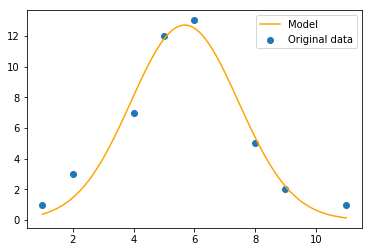

In [40]:
x = np.linspace(1, 11, 100)
plt.scatter(t_i, y_i, label="Original data")
plt.plot(x, c1*exp(-c2*(x-c3)**2), label="Model", c='orange')
plt.legend()

plt.show()

### Q. 10

In [41]:
t_i = np.array([1, 2, 2, 3, 4])
y_i = np.array([3, 5, 7, 5, 1])

def model(c1, c2, c3):
    return c1*exp(-c2*(t_i-c3)**2)

def r(X):
    x, y, z = X
    return model(x, y, z) - y_i

def Dr(X):
    x, y, z = X
    
    dr1 = exp(-y*(t_i-z)**2)
    dr2 = x*exp(-y*(t_i-z)**2) * (-(t_i-z)**2)
    dr3 = x*exp(-y*(t_i-z)**2) * 2*y*(t_i-z)
    
    return np.array([dr1, dr2, dr3]).T

conv = np.array([6.301, 0.5088, 2.249])

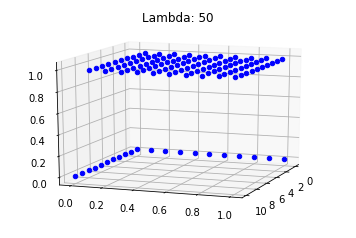

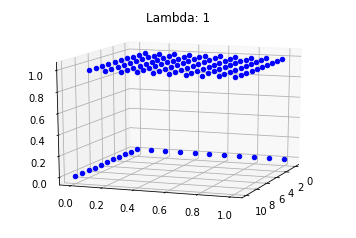

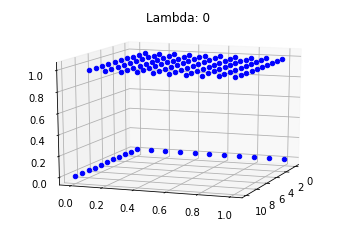

In [42]:
for lamb_init in [50, 1, 0]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for c1_init in range(11):
        for c2_init in np.arange(0, 1.1, 0.1):
            try:
                initial_guess = np.array((c1_init, c2_init, 1), dtype=float) 

                c_guess = Levenberg_Marquardt(r, Dr, initial_guess, lamb)
                test = int(abs(np.mean(c_guess - conv)) < 1e-3)

                ax.scatter(c1_init, c2_init, test, c='blue')
            except:
                ax.scatter(c1_init, c2_init, 0, c='blue')

    ax.view_init(13.5, 20)        
    plt.title("Lambda: %d" % lamb_init)
    plt.show()

### Q. 11

In [43]:
def model(c1, c2, c3, c4):
    return c1*exp(-c2*t_i)*cos(c3*t_i+c4)

def r(X):
    x, y, z, w = X
    return model(x, y, z, w) - y_i

def Dr(X):
    x, y, z, w = X
    
    dr1 = exp(-y*t_i)*cos(z*t_i+w)
    dr2 = x*exp(-y*t_i)*cos(z*t_i+w) * (-t_i)
    dr3 = x*exp(-y*t_i) * (-sin(z*t_i+w)*t_i)
    dr4 = x*exp(-y*t_i) * (-sin(z*t_i+w))
    
    return np.array([dr1, dr2, dr3, dr4]).T

In [44]:
# (a)
t_i = np.array([0, 2, 3, 5, 6, 8, 10])
y_i = np.array([3, -5, -2, 2, 1, -1, 0])

In [45]:
initial_guess = np.array((1, 1, 1, 1), dtype=float) 
lamb = 50
c1, c2, c3, c4 = Levenberg_Marquardt(r, Dr, initial_guess, lamb)
RMSE = sqrt(np.mean((model(c1, c2, c3, c4) - y_i)**2))

print("Initial guess: (1, 1, 1, 1)")
print("lambda: %d" % lamb)
print("RMSE: %f" % RMSE)

Initial guess: (1, 1, 1, 1)
lambda: 50
RMSE: 0.077845


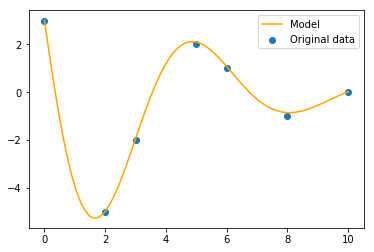

In [46]:
x = np.linspace(0, 10, 100)
plt.scatter(t_i, y_i, label="Original data")
plt.plot(x, c1*exp(-c2*x)*cos(c3*x+c4), label="Model", c='orange')
plt.legend()

plt.show()

In [47]:
# (b)
t_i = np.array([1, 3, 4, 5, 6, 8])
y_i = np.array([2, 6, 4, 2, -1, -3])

In [48]:
initial_guess = np.array((2, 1, 1, 2), dtype=float) 
lamb = 50
c1, c2, c3, c4 = Levenberg_Marquardt(r, Dr, initial_guess, lamb)
RMSE = sqrt(np.mean((model(c1, c2, c3, c4) - y_i)**2))

print("Initial guess: (2, 1, 1, 2)")
print("lambda: %d" % lamb)
print("RMSE: %f" % RMSE)

Initial guess: (2, 1, 1, 2)
lambda: 50
RMSE: 0.199645


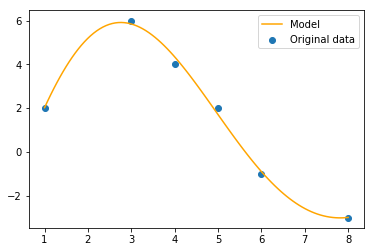

In [49]:
x = np.linspace(1, 8, 100)
plt.scatter(t_i, y_i, label="Original data")
plt.plot(x, c1*exp(-c2*x)*cos(c3*x+c4), label="Model", c='orange')
plt.legend()

plt.show()